In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing import image 
from keras.preprocessing.image import load_img 
import pandas as pd 
from keras.utils import to_categorical
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, f1_score, confusion_matrix,precision_score,recall_score,average_precision_score
from itertools import cycle
import itertools

In [2]:
pistol_paths = [f'./Separated/FinalImages/Pistol/{i}' for i in os.listdir('./Separated/FinalImages/Pistol')] 
pistol_paths

['./Separated/FinalImages/Pistol/0.png',
 './Separated/FinalImages/Pistol/1.png',
 './Separated/FinalImages/Pistol/10.png',
 './Separated/FinalImages/Pistol/1000.png',
 './Separated/FinalImages/Pistol/1001.png',
 './Separated/FinalImages/Pistol/1002.png',
 './Separated/FinalImages/Pistol/1003.png',
 './Separated/FinalImages/Pistol/1004.png',
 './Separated/FinalImages/Pistol/1005.png',
 './Separated/FinalImages/Pistol/1006.png',
 './Separated/FinalImages/Pistol/1007.png',
 './Separated/FinalImages/Pistol/1008.png',
 './Separated/FinalImages/Pistol/1009.png',
 './Separated/FinalImages/Pistol/1010.png',
 './Separated/FinalImages/Pistol/1011.png',
 './Separated/FinalImages/Pistol/1012.png',
 './Separated/FinalImages/Pistol/1013.png',
 './Separated/FinalImages/Pistol/1014.png',
 './Separated/FinalImages/Pistol/1015.png',
 './Separated/FinalImages/Pistol/1016.png',
 './Separated/FinalImages/Pistol/1017.png',
 './Separated/FinalImages/Pistol/1018.png',
 './Separated/FinalImages/Pistol/1019.pn

In [3]:
pistol_labels = [1 for i in range(len(pistol_paths))]
pistol_labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [4]:
print(len(pistol_paths))

2933


In [5]:
rifle_paths = [f'./Separated/FinalImages/Rifle/{i}' for i in os.listdir('./Separated/FinalImages/Rifle')] 
rifle_paths

['./Separated/FinalImages/Rifle/100.png',
 './Separated/FinalImages/Rifle/101.png',
 './Separated/FinalImages/Rifle/102.png',
 './Separated/FinalImages/Rifle/103.png',
 './Separated/FinalImages/Rifle/1034.png',
 './Separated/FinalImages/Rifle/1035.png',
 './Separated/FinalImages/Rifle/1038.png',
 './Separated/FinalImages/Rifle/1039.png',
 './Separated/FinalImages/Rifle/104.png',
 './Separated/FinalImages/Rifle/105.png',
 './Separated/FinalImages/Rifle/106.png',
 './Separated/FinalImages/Rifle/1068.png',
 './Separated/FinalImages/Rifle/1069.png',
 './Separated/FinalImages/Rifle/107.png',
 './Separated/FinalImages/Rifle/108.png',
 './Separated/FinalImages/Rifle/109.png',
 './Separated/FinalImages/Rifle/11.png',
 './Separated/FinalImages/Rifle/110.png',
 './Separated/FinalImages/Rifle/1102.png',
 './Separated/FinalImages/Rifle/1103.png',
 './Separated/FinalImages/Rifle/111.png',
 './Separated/FinalImages/Rifle/1116.png',
 './Separated/FinalImages/Rifle/1117.png',
 './Separated/FinalImages

In [6]:
rifle_labels = [2 for i in range(len(rifle_paths))]    
rifle_labels

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [7]:
print(len(rifle_paths))

1370


In [8]:
neg_paths = [f'./hand_dataset/Neg/{i}' for i in os.listdir('./hand_dataset/Neg')]
neg_paths

['./hand_dataset/Neg/Poselet_10.jpg',
 './hand_dataset/Neg/Poselet_100.jpg',
 './hand_dataset/Neg/Poselet_101.jpg',
 './hand_dataset/Neg/Poselet_102.jpg',
 './hand_dataset/Neg/Poselet_103.jpg',
 './hand_dataset/Neg/Poselet_104.jpg',
 './hand_dataset/Neg/Poselet_105.jpg',
 './hand_dataset/Neg/Poselet_106.jpg',
 './hand_dataset/Neg/Poselet_107.jpg',
 './hand_dataset/Neg/Poselet_108.jpg',
 './hand_dataset/Neg/Poselet_109.jpg',
 './hand_dataset/Neg/Poselet_11.jpg',
 './hand_dataset/Neg/Poselet_110.jpg',
 './hand_dataset/Neg/Poselet_111.jpg',
 './hand_dataset/Neg/Poselet_112.jpg',
 './hand_dataset/Neg/Poselet_113.jpg',
 './hand_dataset/Neg/Poselet_114.jpg',
 './hand_dataset/Neg/Poselet_115.jpg',
 './hand_dataset/Neg/Poselet_116.jpg',
 './hand_dataset/Neg/Poselet_117.jpg',
 './hand_dataset/Neg/Poselet_118.jpg',
 './hand_dataset/Neg/Poselet_119.jpg',
 './hand_dataset/Neg/Poselet_12.jpg',
 './hand_dataset/Neg/Poselet_120.jpg',
 './hand_dataset/Neg/Poselet_121.jpg',
 './hand_dataset/Neg/Poselet

In [9]:
np.random.shuffle(neg_paths)
neg_paths

['./hand_dataset/Neg/VOC2010_504.jpg',
 './hand_dataset/Neg/VOC2007_793.jpg',
 './hand_dataset/Neg/VOC2010_1219.jpg',
 './hand_dataset/Neg/VOC2010_727.jpg',
 './hand_dataset/Neg/VOC2010_841.jpg',
 './hand_dataset/Neg/VOC2007_99.jpg',
 './hand_dataset/Neg/VOC2007_691.jpg',
 './hand_dataset/Neg/VOC2010_331.jpg',
 './hand_dataset/Neg/Skin_227.jpg',
 './hand_dataset/Neg/VOC2010_92.jpg',
 './hand_dataset/Neg/VOC2010_971.jpg',
 './hand_dataset/Neg/VOC2010_1295.jpg',
 './hand_dataset/Neg/VOC2010_1358.jpg',
 './hand_dataset/Neg/Poselet_152.jpg',
 './hand_dataset/Neg/VOC2007_654.jpg',
 './hand_dataset/Neg/VOC2007_631.jpg',
 './hand_dataset/Neg/VOC2007_51.jpg',
 './hand_dataset/Neg/VOC2007_213.jpg',
 './hand_dataset/Neg/VOC2010_862.jpg',
 './hand_dataset/Neg/VOC2010_335.jpg',
 './hand_dataset/Neg/VOC2010_1412.jpg',
 './hand_dataset/Neg/VOC2010_547.jpg',
 './hand_dataset/Neg/VOC2010_885.jpg',
 './hand_dataset/Neg/Skin_196.jpg',
 './hand_dataset/Neg/VOC2007_262.jpg',
 './hand_dataset/Neg/Poselet_1

In [10]:
print(len(neg_paths))

2953


In [11]:
neg_paths = neg_paths[:len(pistol_paths)- 500]
neg_paths

['./hand_dataset/Neg/VOC2010_504.jpg',
 './hand_dataset/Neg/VOC2007_793.jpg',
 './hand_dataset/Neg/VOC2010_1219.jpg',
 './hand_dataset/Neg/VOC2010_727.jpg',
 './hand_dataset/Neg/VOC2010_841.jpg',
 './hand_dataset/Neg/VOC2007_99.jpg',
 './hand_dataset/Neg/VOC2007_691.jpg',
 './hand_dataset/Neg/VOC2010_331.jpg',
 './hand_dataset/Neg/Skin_227.jpg',
 './hand_dataset/Neg/VOC2010_92.jpg',
 './hand_dataset/Neg/VOC2010_971.jpg',
 './hand_dataset/Neg/VOC2010_1295.jpg',
 './hand_dataset/Neg/VOC2010_1358.jpg',
 './hand_dataset/Neg/Poselet_152.jpg',
 './hand_dataset/Neg/VOC2007_654.jpg',
 './hand_dataset/Neg/VOC2007_631.jpg',
 './hand_dataset/Neg/VOC2007_51.jpg',
 './hand_dataset/Neg/VOC2007_213.jpg',
 './hand_dataset/Neg/VOC2010_862.jpg',
 './hand_dataset/Neg/VOC2010_335.jpg',
 './hand_dataset/Neg/VOC2010_1412.jpg',
 './hand_dataset/Neg/VOC2010_547.jpg',
 './hand_dataset/Neg/VOC2010_885.jpg',
 './hand_dataset/Neg/Skin_196.jpg',
 './hand_dataset/Neg/VOC2007_262.jpg',
 './hand_dataset/Neg/Poselet_1

In [12]:
neg_labels = [0 for i in range(len(neg_paths))]
neg_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [13]:
print(len(neg_paths))

2433


In [14]:
paths = pistol_paths + rifle_paths + neg_paths

In [15]:
paths

['./Separated/FinalImages/Pistol/0.png',
 './Separated/FinalImages/Pistol/1.png',
 './Separated/FinalImages/Pistol/10.png',
 './Separated/FinalImages/Pistol/1000.png',
 './Separated/FinalImages/Pistol/1001.png',
 './Separated/FinalImages/Pistol/1002.png',
 './Separated/FinalImages/Pistol/1003.png',
 './Separated/FinalImages/Pistol/1004.png',
 './Separated/FinalImages/Pistol/1005.png',
 './Separated/FinalImages/Pistol/1006.png',
 './Separated/FinalImages/Pistol/1007.png',
 './Separated/FinalImages/Pistol/1008.png',
 './Separated/FinalImages/Pistol/1009.png',
 './Separated/FinalImages/Pistol/1010.png',
 './Separated/FinalImages/Pistol/1011.png',
 './Separated/FinalImages/Pistol/1012.png',
 './Separated/FinalImages/Pistol/1013.png',
 './Separated/FinalImages/Pistol/1014.png',
 './Separated/FinalImages/Pistol/1015.png',
 './Separated/FinalImages/Pistol/1016.png',
 './Separated/FinalImages/Pistol/1017.png',
 './Separated/FinalImages/Pistol/1018.png',
 './Separated/FinalImages/Pistol/1019.pn

In [16]:
len(paths)

6736

In [17]:
labels = pistol_labels + rifle_labels + neg_labels

In [18]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [19]:
len(labels)

6736

In [20]:
x_train, x_test, y_train, y_test = train_test_split(paths, labels, stratify = labels, train_size = .80, random_state = 10)

In [21]:
x_train

['./Separated/FinalImages/Pistol/3805.png',
 './Separated/FinalImages/Pistol/2935.png',
 './hand_dataset/Neg/VOC2007_229.jpg',
 './hand_dataset/Neg/Skin_284.jpg',
 './hand_dataset/Neg/VOC2010_984.jpg',
 './Separated/FinalImages/Rifle/254.png',
 './Separated/FinalImages/Rifle/3619.png',
 './Separated/FinalImages/Rifle/3880.png',
 './Separated/FinalImages/Pistol/1754.png',
 './Separated/FinalImages/Pistol/3453.png',
 './hand_dataset/Neg/Skin_237.jpg',
 './hand_dataset/Neg/Skin_59.jpg',
 './Separated/FinalImages/Rifle/235.png',
 './hand_dataset/Neg/VOC2010_950.jpg',
 './Separated/FinalImages/Pistol/2576.png',
 './hand_dataset/Neg/Skin_212.jpg',
 './Separated/FinalImages/Pistol/1801.png',
 './Separated/FinalImages/Rifle/229.png',
 './hand_dataset/Neg/VOC2010_405.jpg',
 './Separated/FinalImages/Rifle/902.png',
 './Separated/FinalImages/Pistol/1252.png',
 './Separated/FinalImages/Rifle/1450.png',
 './Separated/FinalImages/Pistol/2512.png',
 './Separated/FinalImages/Pistol/504.png',
 './Separ

In [22]:
x_test

['./Separated/FinalImages/Pistol/1236.png',
 './Separated/FinalImages/Rifle/257.png',
 './hand_dataset/Neg/Poselet_28.jpg',
 './Separated/FinalImages/Rifle/406.png',
 './Separated/FinalImages/Pistol/3808.png',
 './Separated/FinalImages/Rifle/93.png',
 './Separated/FinalImages/Pistol/2272.png',
 './Separated/FinalImages/Pistol/3216.png',
 './Separated/FinalImages/Rifle/808.png',
 './Separated/FinalImages/Rifle/2121.png',
 './Separated/FinalImages/Pistol/4136.png',
 './hand_dataset/Neg/VOC2010_1010.jpg',
 './hand_dataset/Neg/Poselet_381.jpg',
 './hand_dataset/Neg/VOC2010_168.jpg',
 './Separated/FinalImages/Pistol/724.png',
 './hand_dataset/Neg/Poselet_68.jpg',
 './hand_dataset/Neg/Skin_251.jpg',
 './hand_dataset/Neg/VOC2007_418.jpg',
 './hand_dataset/Neg/Poselet_25.jpg',
 './Separated/FinalImages/Pistol/2503.png',
 './Separated/FinalImages/Pistol/2788.png',
 './hand_dataset/Neg/VOC2010_781.jpg',
 './Separated/FinalImages/Pistol/1414.png',
 './hand_dataset/Neg/VOC2010_774.jpg',
 './Separa

In [23]:
y_train

[1,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,


In [24]:
y_test

[1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,


In [25]:
len(x_train)

5388

In [26]:
len(x_test)

1348

In [27]:
len(y_train)

5388

In [28]:
len(y_test)

1348

In [29]:
DIM =  (224, 224)  

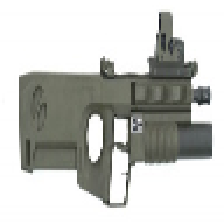

In [30]:
img = image.load_img('./Separated/FinalImages/Rifle/103.png', target_size = DIM)
img

In [31]:
img = image.img_to_array(img)
img

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [32]:
def get_img_array(img_paths, dim): 
    final_array = []
    for path in img_paths:
        img = get_image_value(path, dim)
        final_array.append(img)
    final_array = np.array(final_array)
    
    return final_array

In [33]:
def get_image_value(path, dim):
    img = image.load_img(path, target_size = dim)
    img = image.img_to_array(img)
    
    return img/255

In [34]:
+x_train = get_img_array(x_train, DIM)

In [35]:
x_train

array([[[[0.38039216, 0.35686275, 0.29411766],
         [0.38039216, 0.35686275, 0.29411766],
         [0.38039216, 0.35686275, 0.29411766],
         ...,
         [0.5019608 , 0.47843137, 0.41960785],
         [0.52156866, 0.49803922, 0.43529412],
         [0.52156866, 0.49803922, 0.43529412]],

        [[0.38039216, 0.35686275, 0.29411766],
         [0.38039216, 0.35686275, 0.29411766],
         [0.38039216, 0.35686275, 0.29411766],
         ...,
         [0.5019608 , 0.47843137, 0.41960785],
         [0.52156866, 0.49803922, 0.43529412],
         [0.52156866, 0.49803922, 0.43529412]],

        [[0.38039216, 0.35686275, 0.29411766],
         [0.38039216, 0.35686275, 0.29411766],
         [0.38039216, 0.3529412 , 0.2901961 ],
         ...,
         [0.45490196, 0.43137255, 0.37254903],
         [0.44705883, 0.42352942, 0.3647059 ],
         [0.44705883, 0.42352942, 0.3647059 ]],

        ...,

        [[0.3882353 , 0.3647059 , 0.31764707],
         [0.3882353 , 0.3647059 , 0.31764707]

In [36]:
x_test = get_img_array(x_test, DIM)

In [37]:
x_test

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.12941177, 0.10980392, 0.08627451],
         [0.14509805, 0.13333334, 0.10588235],
         [0.14509805, 0.13333334, 0.10588235]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.12941177, 0.10980392, 0.08627451],
         [0.14509805, 0.13333334, 0.10588235],
         [0.14509805, 0.13333334, 0.10588235]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.14117648, 0.12156863, 0.09803922],
         [0.13725491, 0.1254902 , 0.10588235],
         [0.13725491, 0.1254902 , 0.10588235]],

        ...,

        [[0.23137255, 0.14509805, 0.09411765],
         [0.23137255, 0.14509805, 0.09411765]

In [38]:
print('Train Value Counts')
print(pd.Series(y_train).value_counts())

Train Value Counts
1    2346
0    1946
2    1096
Name: count, dtype: int64


In [39]:
print('Test Value Counts')
print(pd.Series(y_test).value_counts())

Test Value Counts
1    587
0    487
2    274
Name: count, dtype: int64


In [40]:
print('X Train Shape')
print(x_train.shape)

X Train Shape
(5388, 224, 224, 3)


In [41]:
print('X Test Shape')
print(x_test.shape)

X Test Shape
(1348, 224, 224, 3)


In [42]:
y_train = np.array(y_train)
y_train

array([1, 1, 0, ..., 2, 0, 1])

In [43]:
y_test = np.array(y_test)
y_test

array([1, 2, 0, ..., 0, 1, 1])

In [44]:
y=y_test
y_test = to_categorical(y_test)
y_test

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [45]:
y1=y_train
y_train = to_categorical(y_train)
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [46]:
model = MobileNetV2()

In [48]:
def get_mobilenet(dim):
    model = Sequential()
    optimizer = Adam(lr = .0005)
    baseModel = MobileNetV2(weights="imagenet", include_top=False,
        input_tensor=Input(shape=dim))
    
    model.add(baseModel)
    model.add(AveragePooling2D(pool_size=(7, 7)))
    model.add(Flatten(name="flatten"))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation="softmax", name = 'Output'))

    
    for layer in baseModel.layers:
        layer.trainable = False
        
    model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    return model

In [49]:
epochs = 20
batch_size = 16
dim = (224, 224, 3)

In [50]:
mobilenet = get_mobilenet(dim =dim)

In [51]:
early_stopping = EarlyStopping(monitor='val_loss', verbose = 1, patience=10, min_delta = .00075)
model_checkpoint = ModelCheckpoint('A:\weapon\weights.h5', verbose = 1, save_best_only=True,
                                  monitor = 'val_loss')
lr_plat = ReduceLROnPlateau(patience = 5, mode = 'min')

In [52]:
mobilenet_history = mobilenet.fit(x_train, y_train, batch_size = batch_size,
            epochs = epochs, callbacks = [early_stopping, model_checkpoint, lr_plat], validation_data = (x_test, y_test), verbose= 1)

Epoch 1/20
337/337 [==============================] - ETA: 0s - loss: 0.2927 - accuracy: 0.8812
Epoch 1: val_loss improved from inf to 0.22589, saving model to A:\weapon\weights.h5


C:\Users\Afrid shaik\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


337/337 [==============================] - 158s 457ms/step - loss: 0.2927 - accuracy: 0.8812 - val_loss: 0.2259 - val_accuracy: 0.9043 - lr: 0.0010
Epoch 2/20
337/337 [==============================] - ETA: 0s - loss: 0.2074 - accuracy: 0.9159
Epoch 2: val_loss improved from 0.22589 to 0.20134, saving model to A:\weapon\weights.h5
337/337 [==============================] - 143s 426ms/step - loss: 0.2074 - accuracy: 0.9159 - val_loss: 0.2013 - val_accuracy: 0.9177 - lr: 0.0010
Epoch 3/20
337/337 [==============================] - ETA: 0s - loss: 0.1810 - accuracy: 0.9278
Epoch 3: val_loss improved from 0.20134 to 0.19354, saving model to A:\weapon\weights.h5
337/337 [==============================] - 1518s 5s/step - loss: 0.1810 - accuracy: 0.9278 - val_loss: 0.1935 - val_accuracy: 0.9258 - lr: 0.0010
Epoch 4/20
337/337 [==============================] - ETA: 0s - loss: 0.1644 - accuracy: 0.9315
Epoch 4: val_loss did not improve from 0.19354
337/337 [==============================] - 65

In [53]:
mobilenet_history.history['loss']

[0.2927108705043793,
 0.20740443468093872,
 0.18099935352802277,
 0.16444101929664612,
 0.14607670903205872,
 0.12401924282312393,
 0.11172689497470856,
 0.11249203979969025,
 0.08535948395729065,
 0.07866545766592026,
 0.07446842640638351,
 0.06724533438682556,
 0.06058421730995178,
 0.05308319628238678,
 0.02841946855187416,
 0.020271385088562965,
 0.01755288429558277,
 0.015499558299779892,
 0.014174585230648518]

In [54]:
mobilenet_history.history['accuracy']

[0.8812175393104553,
 0.9159242510795593,
 0.9278025031089783,
 0.9315145015716553,
 0.9422791600227356,
 0.9502598643302917,
 0.9532294273376465,
 0.9561989903450012,
 0.967706024646759,
 0.9699332118034363,
 0.9721603393554688,
 0.9773570895195007,
 0.9756867289543152,
 0.9784706830978394,
 0.9920192956924438,
 0.9953600764274597,
 0.9957312345504761,
 0.9959168434143066,
 0.9961024522781372]

In [55]:
mobilenet_history.history['val_loss']

[0.22588704526424408,
 0.20133528113365173,
 0.19353856146335602,
 0.2028099149465561,
 0.1900564432144165,
 0.19328182935714722,
 0.25536689162254333,
 0.20924845337867737,
 0.18339255452156067,
 0.24607215821743011,
 0.21099448204040527,
 0.22121299803256989,
 0.2290908396244049,
 0.19296002388000488,
 0.1940905898809433,
 0.20022529363632202,
 0.2092774212360382,
 0.21393653750419617,
 0.2157011181116104]

In [56]:
mobilenet_history.history['val_accuracy']

[0.9043026566505432,
 0.9176557660102844,
 0.925815999507904,
 0.9169139266014099,
 0.9206231236457825,
 0.9280415177345276,
 0.9094955325126648,
 0.9191394448280334,
 0.9324925541877747,
 0.9087536931037903,
 0.9272996783256531,
 0.9339762330055237,
 0.9272996783256531,
 0.9451038837432861,
 0.9451038837432861,
 0.9480712413787842,
 0.9495549201965332,
 0.9488130807876587,
 0.9502967596054077]

In [57]:
x_test

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.12941177, 0.10980392, 0.08627451],
         [0.14509805, 0.13333334, 0.10588235],
         [0.14509805, 0.13333334, 0.10588235]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.12941177, 0.10980392, 0.08627451],
         [0.14509805, 0.13333334, 0.10588235],
         [0.14509805, 0.13333334, 0.10588235]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.14117648, 0.12156863, 0.09803922],
         [0.13725491, 0.1254902 , 0.10588235],
         [0.13725491, 0.1254902 , 0.10588235]],

        ...,

        [[0.23137255, 0.14509805, 0.09411765],
         [0.23137255, 0.14509805, 0.09411765]

In [58]:
y_pred=mobilenet.predict(x_test)

43/43 [==============================] - 34s 703ms/step


In [59]:
len(y_pred)

1348

In [60]:
y_pred

array([[1.4096012e-14, 9.9999881e-01, 1.1403279e-06],
       [9.1331595e-12, 4.2355716e-10, 1.0000000e+00],
       [1.0000000e+00, 1.3019222e-26, 3.5362114e-26],
       ...,
       [1.0000000e+00, 3.6576676e-22, 1.8776311e-18],
       [6.2705050e-16, 1.0000000e+00, 1.5642128e-10],
       [1.0442874e-08, 9.9987221e-01, 1.2780110e-04]], dtype=float32)

In [61]:
for i in y_pred:
    print(np.argmax(i))

1
2
0
2
1
2
1
1
2
2
1
0
0
0
1
0
0
0
0
1
1
0
1
0
1
1
1
1
2
0
1
1
1
0
1
1
1
1
1
1
2
1
0
0
2
2
0
0
1
1
1
0
1
2
2
1
0
0
0
1
1
0
1
0
1
2
2
0
2
1
1
1
1
2
1
1
0
1
1
2
0
0
0
0
0
0
2
0
1
0
2
1
1
0
2
0
1
2
1
2
0
2
1
0
1
0
2
1
1
1
0
1
2
1
0
2
2
0
0
1
2
1
2
1
0
1
2
0
0
2
1
2
0
2
2
0
2
1
1
2
1
1
2
1
2
1
0
0
1
0
0
1
0
0
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
2
2
1
1
0
0
2
0
1
2
2
0
1
1
0
1
2
0
0
0
2
0
1
1
0
0
1
1
0
0
1
1
1
2
2
0
1
1
2
1
2
1
0
0
0
1
0
2
1
1
1
0
1
1
0
2
1
0
0
0
0
1
1
1
0
1
0
0
0
1
0
0
0
0
1
0
1
1
1
1
0
2
1
1
1
2
1
0
0
1
1
2
0
0
1
1
2
2
0
1
0
1
0
0
1
1
1
2
0
1
2
2
1
1
0
1
0
1
0
1
0
2
2
1
1
0
2
1
0
1
2
1
0
2
2
2
0
0
0
1
0
0
0
1
2
1
1
2
1
1
0
0
0
2
0
1
1
2
0
0
1
1
1
1
0
1
1
2
0
2
1
1
1
1
1
0
2
1
0
1
1
0
1
1
1
0
0
0
0
0
0
1
2
1
1
1
1
0
1
1
1
1
0
1
0
1
2
1
1
0
0
0
1
1
1
2
0
1
0
1
1
2
1
2
0
1
1
0
2
0
1
0
0
2
1
0
1
1
0
1
0
1
1
2
2
2
0
0
1
1
0
0
0
2
1
1
1
0
2
2
0
0
0
1
0
1
0
0
1
1
0
2
1
2
2
1
0
0
1
0
0
1
0
0
1
0
1
1
1
2
0
0
1
1
0
1
0
1
0
1
1
0
1
0
0
0
2
0
0
0
0
2
0
1
0
0
1
1
1
1
1
2
1
1
0
1
0
0
2
2
1


In [62]:
y_pred =[ np.argmax(i) for i in y_pred ]

In [63]:
y_pred

[1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,


In [64]:
y

array([1, 2, 0, ..., 0, 1, 1])

In [65]:
y_test=y
y_test

array([1, 2, 0, ..., 0, 1, 1])

In [66]:
f1 = f1_score(y_test,y_pred,average = None)

In [67]:
statement = f'F1 Scores Test\n~~~~~~~~~~~~~~~~~~~~~~\nNo Weapon: {f1[0]}\nPistol: {f1[1]}\nRifle: {f1[2]}'
print(statement)

F1 Scores Test
~~~~~~~~~~~~~~~~~~~~~~
No Weapon: 1.0
Pistol: 0.9436501261564338
Rifle: 0.874296435272045


In [68]:
p = precision_score(y_test,y_pred,average = None)

In [69]:
statement1 = f'precision Scores Test\n~~~~~~~~~~~~~~~~~~~~~~\nNo Weapon: {p[0]}\nPistol: {p[1]}\nRifle: {p[2]}'
print(statement1)

precision Scores Test
~~~~~~~~~~~~~~~~~~~~~~
No Weapon: 1.0
Pistol: 0.9318936877076412
Rifle: 0.8996138996138996


In [70]:
r = recall_score(y_test,y_pred,average = None)

In [71]:
statement1 = f'recall Scores Test\n~~~~~~~~~~~~~~~~~~~~~~\nNo Weapon: {r[0]}\nPistol: {r[1]}\nRifle: {r[2]}'
print(statement1)

recall Scores Test
~~~~~~~~~~~~~~~~~~~~~~
No Weapon: 1.0
Pistol: 0.9557069846678024
Rifle: 0.8503649635036497


In [72]:
def plot_loss_accuracy(model_history, theme): 
    '''This function will create a graph showing the change in loss throughout each epoch'''
    plt.style.use(theme)
    train_loss = model_history.history['loss']
    train_acc = model_history.history['accuracy']
    test_loss = model_history.history['val_loss']
    test_acc = model_history.history['val_accuracy']
    epochs = [i for i in range(1, len(test_acc)+1)]

    fig, ax = plt.subplots(1,2, figsize = (10,5))
    ax[0].plot(epochs, train_loss, label = 'Train Loss')
    ax[0].plot(epochs, test_loss, label = 'Test Loss')
    ax[0].set_title('Train/Test Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss (cateogircal_crossentropy)')
    ax[0].legend()

    ax[1].plot(epochs, train_acc, label = 'Train Accuracy')
    ax[1].plot(epochs, test_acc, label = 'Test Accuracy')
    ax[1].set_title('Train/Test Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()
    

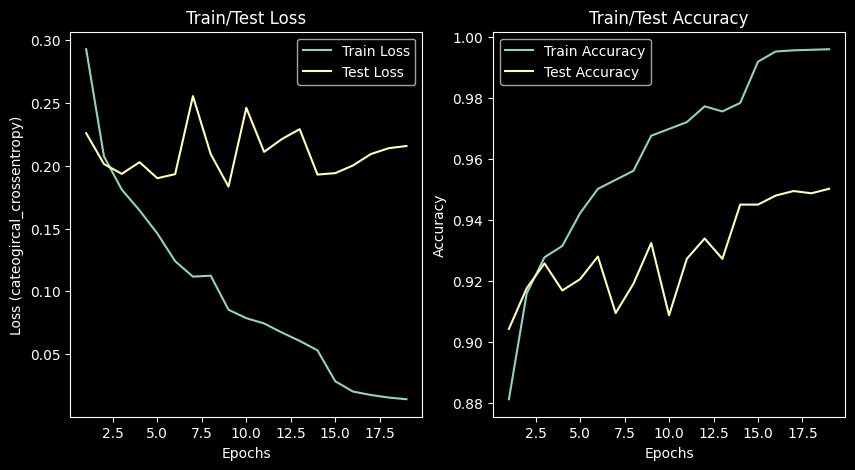

In [73]:
plot_loss_accuracy(mobilenet_history, 'dark_background')  

In [74]:
def plot_model_cm(test_cm, train_cm, classes,theme):

    plt.style.use(theme)

    fig, ax = plt.subplots(1,2, figsize = (8,8))
    
    cmap=plt.cm.Blues
    
    #Test Set
    ax[0].imshow(test_cm, interpolation='nearest', cmap=cmap)
    ax[0].set_title('CM for Test')
    tick_marks = np.arange(len(classes))
    ax[0].set_xticks(tick_marks, classes)
    ax[0].set_yticks(tick_marks, classes)

    fmt ='d'
    thresh = test_cm.max() / 2.
    for i, j in itertools.product(range(test_cm.shape[0]), range(test_cm.shape[1])):
        ax[0].text(j, i, format(test_cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if test_cm[i, j] > thresh else "black")

    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylim(2.5, -.5)

    
    
    #Train Set
    ax[1].imshow(train_cm, interpolation='nearest', cmap=cmap)
    ax[1].set_title('CM for Train')
    tick_marks = np.arange(len(classes))
    ax[1].set_xticks(tick_marks, classes)
    ax[1].set_yticks(tick_marks, classes)

    fmt ='d'
    thresh = train_cm.max() / 2.
    for i, j in itertools.product(range(train_cm.shape[0]), range(train_cm.shape[1])):
        ax[1].text(j, i, format(train_cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if train_cm[i, j] > thresh else "black")

    ax[1].set_ylabel('True label')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylim(2.5, -.5)
    
    plt.tight_layout()
 

In [75]:
mobilenet = get_mobilenet(dim)
mobilenet.load_weights('A:\weapon\weights.h5') #load the best weights before overfitting

In [76]:
x_train

array([[[[0.38039216, 0.35686275, 0.29411766],
         [0.38039216, 0.35686275, 0.29411766],
         [0.38039216, 0.35686275, 0.29411766],
         ...,
         [0.5019608 , 0.47843137, 0.41960785],
         [0.52156866, 0.49803922, 0.43529412],
         [0.52156866, 0.49803922, 0.43529412]],

        [[0.38039216, 0.35686275, 0.29411766],
         [0.38039216, 0.35686275, 0.29411766],
         [0.38039216, 0.35686275, 0.29411766],
         ...,
         [0.5019608 , 0.47843137, 0.41960785],
         [0.52156866, 0.49803922, 0.43529412],
         [0.52156866, 0.49803922, 0.43529412]],

        [[0.38039216, 0.35686275, 0.29411766],
         [0.38039216, 0.35686275, 0.29411766],
         [0.38039216, 0.3529412 , 0.2901961 ],
         ...,
         [0.45490196, 0.43137255, 0.37254903],
         [0.44705883, 0.42352942, 0.3647059 ],
         [0.44705883, 0.42352942, 0.3647059 ]],

        ...,

        [[0.3882353 , 0.3647059 , 0.31764707],
         [0.3882353 , 0.3647059 , 0.31764707]

In [77]:
y_train_prob = [np.argmax(i) for i in mobilenet.predict(x_train)]

169/169 [==============================] - 130s 747ms/step


In [78]:
len(y_train_prob)

5388

In [79]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [80]:
y_train=[np.argmax(i) for i in y_train]

In [81]:
y_train

[1,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,


In [82]:
train_cnf=confusion_matrix(y_train, y_train_prob)
train_cnf

array([[1946,    0,    0],
       [   0, 2306,   40],
       [   0,   41, 1055]], dtype=int64)

In [83]:
y_test_prob = [np.argmax(i) for i in mobilenet.predict(x_test)]

43/43 [==============================] - 30s 679ms/step


In [84]:
y_test_prob

[1,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,


In [85]:
y_test

array([1, 2, 0, ..., 0, 1, 1])

In [86]:
test_cnf = confusion_matrix(y_test, y_test_prob)
test_cnf

array([[487,   0,   0],
       [  0, 535,  52],
       [  0,  39, 235]], dtype=int64)

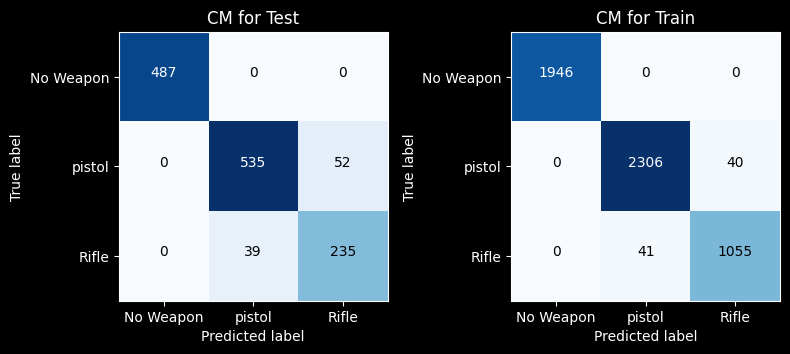

In [87]:
plot_model_cm(test_cnf, train_cnf, classes = ['No Weapon', 'pistol', 'Rifle'], theme = 'dark_background')

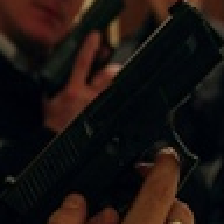

In [88]:
img1 = image.load_img('A:\\weapon\\Separated\\FinalImages\\Pistol\\277.png', target_size = DIM)
img1


In [89]:
a1 = get_img_array(['A:\\weapon\\Separated\\FinalImages\\Pistol\\277.png'], DIM)

In [90]:
a1

array([[[[0.27058825, 0.12156863, 0.07843138],
         [0.27058825, 0.12156863, 0.07843138],
         [0.28627452, 0.1254902 , 0.09019608],
         ...,
         [0.24313726, 0.10980392, 0.07058824],
         [0.21568628, 0.10980392, 0.06666667],
         [0.21568628, 0.10980392, 0.06666667]],

        [[0.27058825, 0.12156863, 0.07843138],
         [0.27058825, 0.12156863, 0.07843138],
         [0.28627452, 0.1254902 , 0.09019608],
         ...,
         [0.24313726, 0.10980392, 0.07058824],
         [0.21568628, 0.10980392, 0.06666667],
         [0.21568628, 0.10980392, 0.06666667]],

        [[0.24313726, 0.10980392, 0.07058824],
         [0.24313726, 0.10980392, 0.07058824],
         [0.2627451 , 0.11764706, 0.07450981],
         ...,
         [0.24313726, 0.11372549, 0.06666667],
         [0.21960784, 0.11372549, 0.07058824],
         [0.21960784, 0.11372549, 0.07058824]],

        ...,

        [[0.00392157, 0.01568628, 0.03529412],
         [0.00392157, 0.01568628, 0.03529412]

In [91]:
p1=mobilenet.predict(a1)

1/1 [==============================] - 0s 142ms/step


In [92]:
p1

array([[1.6744286e-07, 9.3516386e-01, 6.4835846e-02]], dtype=float32)

In [93]:
np.argmax(p1)

1

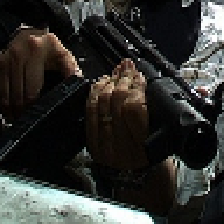

In [94]:
img2 = image.load_img('A:\\weapon\\Separated\\FinalImages\\Rifle\\51.png', target_size = DIM)
img2

In [95]:
a2 = get_img_array(['A:\\weapon\\Separated\\FinalImages\\Rifle\\51.png'], DIM)

In [96]:
a2

array([[[[0.03137255, 0.03137255, 0.04313726],
         [0.03137255, 0.03137255, 0.04313726],
         [0.01960784, 0.02745098, 0.02352941],
         ...,
         [0.38431373, 0.42352942, 0.4509804 ],
         [0.38431373, 0.41568628, 0.43529412],
         [0.38431373, 0.41568628, 0.43529412]],

        [[0.03137255, 0.03137255, 0.04313726],
         [0.03137255, 0.03137255, 0.04313726],
         [0.01960784, 0.02745098, 0.02352941],
         ...,
         [0.38431373, 0.42352942, 0.4509804 ],
         [0.38431373, 0.41568628, 0.43529412],
         [0.38431373, 0.41568628, 0.43529412]],

        [[0.03137255, 0.03921569, 0.03529412],
         [0.03137255, 0.03921569, 0.03529412],
         [0.02352941, 0.03137255, 0.02745098],
         ...,
         [0.25490198, 0.2784314 , 0.3019608 ],
         [0.3529412 , 0.38039216, 0.4       ],
         [0.3529412 , 0.38039216, 0.4       ]],

        ...,

        [[0.5803922 , 0.6627451 , 0.6156863 ],
         [0.5803922 , 0.6627451 , 0.6156863 ]

In [97]:
p2=mobilenet.predict(a2)
p2

1/1 [==============================] - 0s 61ms/step


array([[2.1332422e-09, 1.5100601e-02, 9.8489940e-01]], dtype=float32)

In [98]:
np.argmax(p2)

2